Dataset used: Red wine quality (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) \

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)\

## Downloading libraries and data

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
# loading the dataset
!wget -O winequality.csv 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

--2021-12-15 20:49:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality.csv’

winequality.csv     100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2021-12-15 20:49:15 (589 KB/s) - ‘winequality.csv’ saved [84199/84199]



In [ ]:
# reading data into df
df = pd.read_csv("winequality.csv", sep=';')

## Exploring the data

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(df.shape)

(1599, 12)


In [ ]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
# Checking type of data and % of missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Conclusion: There are no missing values in out data set

### Checking representetion of different classes in the data set

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Counts')

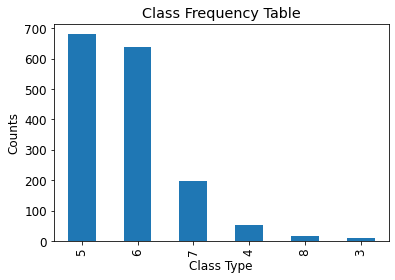

In [ ]:
df['quality'].value_counts().plot(kind='bar')
plt.title('Class Frequency Table')
plt.xlabel('Class Type')
plt.ylabel('Counts')

Conclusion: clasess are disbalanced

### Checking summary of numerical data

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Conclusion: Citric acid, recidual sugar, chlorides, dioxide, sulfur dioxide have high std (around +-50% or more)

### Checking type of distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8988fad4d0>,
      dtype=object)

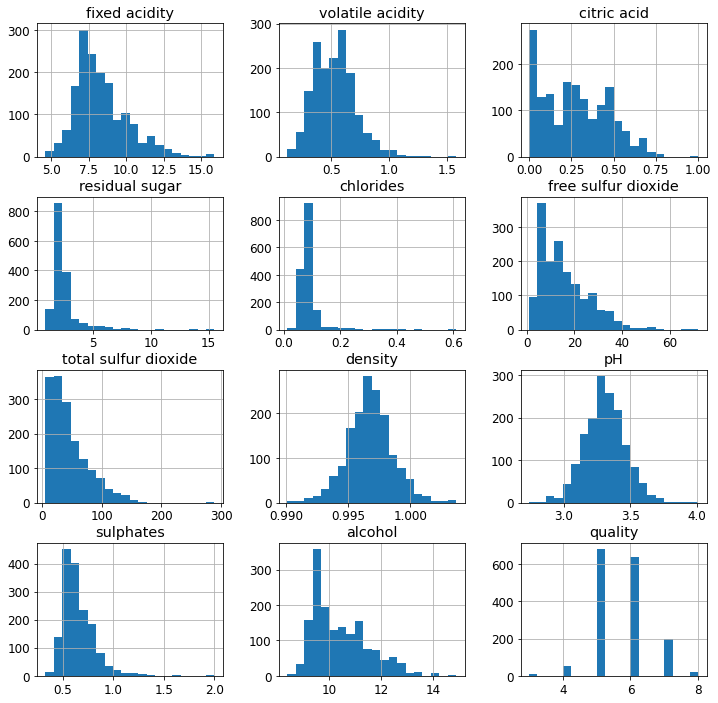

In [ ]:
df.hist(bins=20, figsize=(12,12))

In [ ]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Conclusion: some destributions are scewed

### Checking correletion between the features and noisiness

In [ ]:
# Building a correlation matrix
corr_matrix = df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


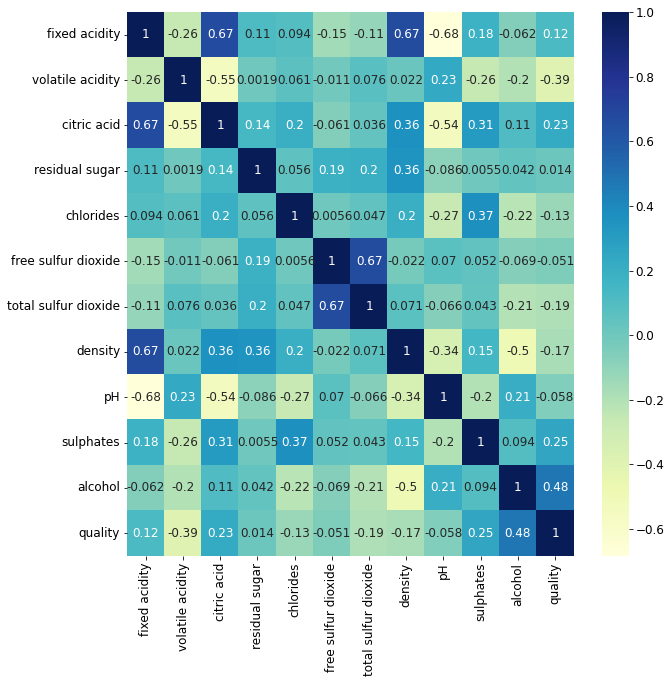

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True);

### Checking the data for outliers

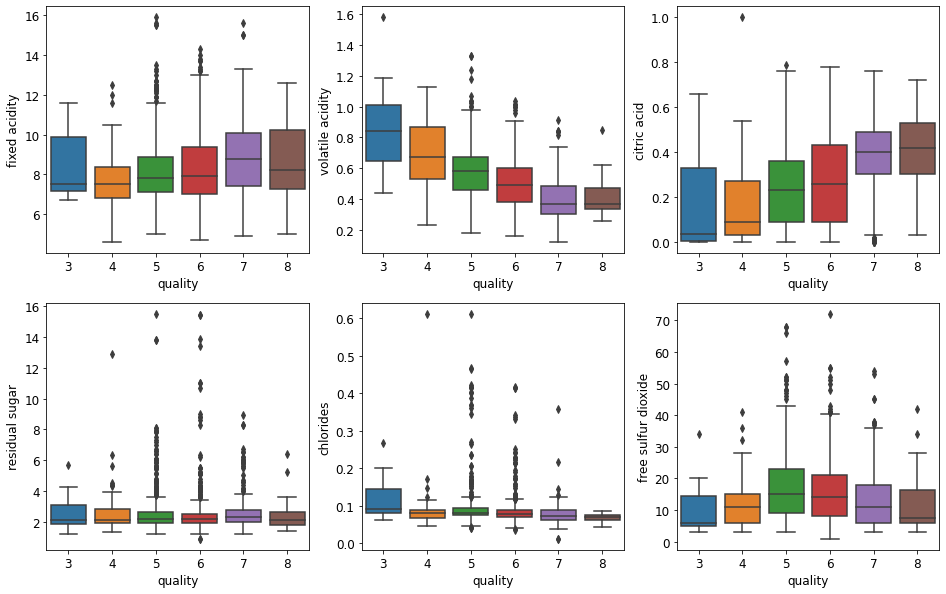

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for idx, feature in  enumerate(df.columns[:6]):
    sns.boxplot(x = 'quality', y = feature, data=df, ax=axes[int(idx / 3), idx % 3])
    axes[int(idx / 3), idx % 3].set_xlabel('quality')
    axes[int(idx / 3), idx % 3].set_ylabel(feature);

Conclusion: majority of features have outliers

## Data pre-processing

In [ ]:
# Wine quality classes are disbalanced. To balance them we will concatenate data in 2 groups: with low (<=5) and high quality wines (>5)
new=[]
for row in df['quality']:
    if (row<=5):
        val=0
    else:
        val=1
    new.append(val)
df['newquality']=new

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


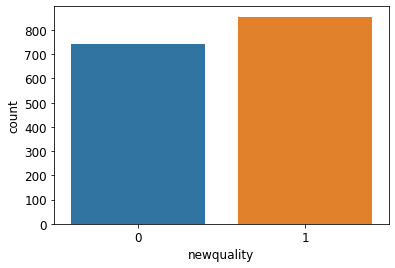

In [ ]:
sns.countplot(df['newquality'])

In [ ]:
# Removing outliers beyond 3 sigma boundaries 
sigma_threshold = 3
low = stats.norm.cdf(-sigma_threshold)
high = stats.norm.cdf(sigma_threshold)
quant_data = df.quantile([low, high])
                         
for name in list(df.drop(labels=['newquality'], axis=1).columns):
    df = df[(df[name] > quant_data.loc[low, name]) & (df[name] < quant_data.loc[high, name])]
print(df.shape)

(1394, 13)


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data to train and test correspodingly. 80% data-train, 20%-test
X=df.drop(['quality','newquality'],axis=1)
Y=df['newquality']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 42) 

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [ ]:
# Избавимся от смещения
for name in list(X_train.columns):
      X_train.loc[:,name], fit_boxcox = stats.boxcox(X_train.loc[:,name])
      X_test.loc[:,name] = stats.boxcox(X_test.loc[:,name], fit_boxcox)

In [ ]:
# I tried different normalization methods, but later on using data  after Z-score application in ML models I achieved better predicted results. 
# Standartisation (mean=0, sd=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train_arrey = scaler.fit_transform(X_train)
scaled_X_test_arrey = scaler.transform(X_test)

scaled_X_train = pd.DataFrame(scaled_X_train_arrey, index=X_train.index, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test_arrey, index=X_test.index, columns=X_test.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8997be0750>,
      dtype=object)

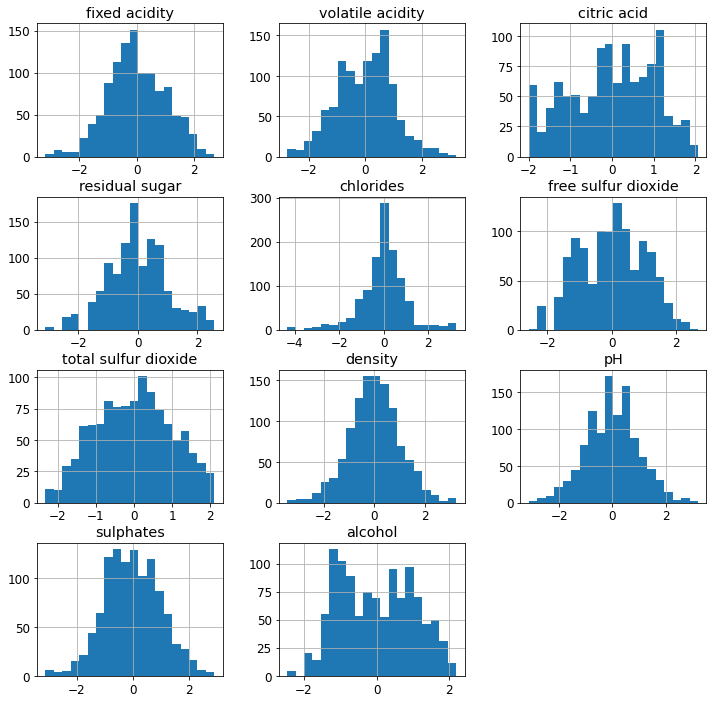

In [ ]:
scaled_X_train.hist(bins=20,figsize=(12,12))

## Building regression models

In [ ]:
def show_best_params(model):
  #The best parameters of the model
  print("Best params:", model.best_params_)
  print("Best cross validaton score", model.best_score_) 

In [ ]:
summary = { 'Model' : [],
            'Accuracy' : [],
            'Precision' : [],
            'Recall' : [],
            'ROC_AUC' : []
          }
def create_summary(Y_predict, model_name):
    summary['Model'].append(model_name)
    summary['Accuracy'].append(metrics.accuracy_score(Y_test, Y_predict))
    summary['Precision'].append(metrics.precision_score(Y_test, Y_predict))
    summary['Recall'].append(metrics.recall_score(Y_test, Y_predict))
    summary['ROC_AUC'].append(metrics.roc_auc_score(Y_test, Y_predict))

    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_predict))
    print("Precision: ", metrics.precision_score(Y_test, Y_predict))
    print("Recall: ", metrics.recall_score(Y_test, Y_predict))
    print("ROC AUC: ", metrics.roc_auc_score(Y_test, Y_predict))

In [ ]:
def create_ROC_curve(model):
  probs = model.best_estimator_.predict_proba(scaled_X_test)
  preds = probs[:,1]

  fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds)

  plt.plot(fpr, tpr)
  plt.xlim([-0.1, 1.1])
  plt.ylim([-0.1, 1.1])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_rm_param_grid = {'C': [0.001,0.001,0.1,1,2,3,4,5]
                  }  
cv = ShuffleSplit(n_splits=5, random_state=0)
model = LogisticRegression(random_state=0)
log_rm_grid_search = GridSearchCV(model, log_rm_param_grid, cv=cv, n_jobs=-1)  
log_rm_grid_search.fit(scaled_X_train, Y_train)
log_rm_predict_Y = log_rm_grid_search.best_estimator_.predict(scaled_X_test)

In [ ]:
show_best_params(log_rm_grid_search)

Best params: {'C': 1}
Best cross validaton score 0.7392857142857143


In [ ]:
create_summary(log_rm_predict_Y, 'Logistic Regression')

Accuracy:  0.7885304659498208
Precision:  0.7959183673469388
Recall:  0.8013698630136986
ROC AUC:  0.7879029766196312


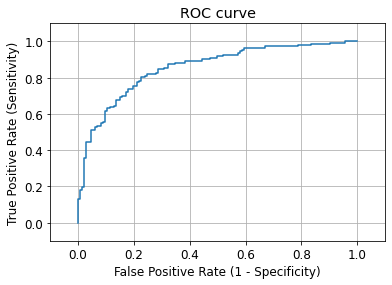

In [ ]:
create_ROC_curve(log_rm_grid_search)

### SVM (Support Vector Machines)

In [ ]:
from sklearn.svm import SVC

# defining parameter range 
svm_param_grid = {'C': [10,9,8,7,6,5,2,1,0.1,0.01]}  

cv = ShuffleSplit(n_splits=5, random_state=0)
model = SVC(gamma = 0.1, kernel='rbf', probability=True, random_state=0)

svm_grid_search = GridSearchCV(model, param_grid=svm_param_grid, cv=cv, n_jobs=-1)  
svm_grid_search.fit(scaled_X_train, Y_train)
svm_Y_predicted = svm_grid_search.best_estimator_.predict(scaled_X_test)

In [ ]:
show_best_params(svm_grid_search)

Best params: {'C': 9}
Best cross validaton score 0.7785714285714287


In [ ]:
create_summary(svm_Y_predicted, 'CVM')

Accuracy:  0.8207885304659498
Precision:  0.82
Recall:  0.8424657534246576
ROC AUC:  0.8197291173138326


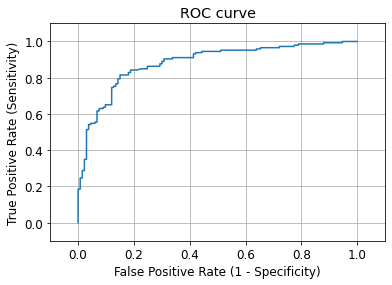

In [ ]:
create_ROC_curve(svm_grid_search)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_param_grid = {'max_depth': list(range(10,20))
                 }
cv = ShuffleSplit(n_splits=5, random_state=0)
model = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, min_samples_split=2, random_state=0, n_jobs=-1)
RF_grid_search = GridSearchCV(model, RF_param_grid, verbose=True, n_jobs=-1, cv=cv)
RF_grid_search.fit(scaled_X_train, Y_train)
RF_Y_predicted = RF_grid_search.best_estimator_.predict(scaled_X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
show_best_params(RF_grid_search)

Best params: {'max_depth': 13}
Best cross validaton score 0.8232142857142856


In [ ]:
# feature importances
pd.DataFrame({'Feature' : list(X_train.columns), 'Importance' : RF_grid_search.best_estimator_.feature_importances_}).sort_values(["Importance"], ascending=False)

,Feature,Importance
10,alcohol,0.175657
6,total sulfur dioxide,0.122513
9,sulphates,0.119870
1,volatile acidity,0.105152
7,density,0.082175
4,chlorides,0.077155
0,fixed acidity,0.069400
2,citric acid,0.067713
8,pH,0.066818
5,free sulfur dioxide,0.058832


In [ ]:
create_summary(RF_Y_predicted, 'Random Forest')

Accuracy:  0.8673835125448028
Precision:  0.8811188811188811
Recall:  0.863013698630137
ROC AUC:  0.8675970748789782


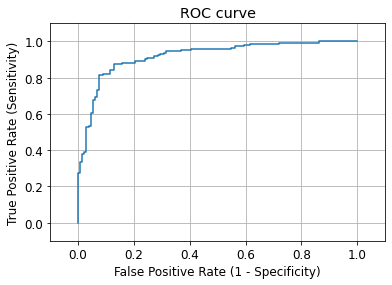

In [ ]:
create_ROC_curve(RF_grid_search)

### XGradient Boosting

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

In [ ]:
import xgboost
from xgboost import XGBClassifier

XGB_grid_param = {'n_estimators' : np.arange(0, 200, 50),
                 }

cv = ShuffleSplit(n_splits=5, random_state=0)
model = XGBClassifier(max_depth=20, learning_rate=0.1, eval_metric = 'logloss', verbose=True, random_state=0)
XGB_grid_search=GridSearchCV(estimator=model, param_grid=XGB_grid_param, n_jobs=-1, cv=cv)

XGB_grid_search.fit(scaled_X_train, Y_train)
XGB_Y_predicted = GB_grid_search.best_estimator_.predict(scaled_X_test)

In [ ]:
show_best_params(XGB_grid_search)

Best params: {'n_estimators': 100}
Best cross validaton score 0.8053571428571429


In [ ]:
pd.DataFrame({'Feature' : list(X_train.columns), 'Importance' : XGB_grid_search.best_estimator_.feature_importances_}).sort_values(["Importance"], ascending=False)

,Feature,Importance
10,alcohol,0.250210
9,sulphates,0.110484
6,total sulfur dioxide,0.107533
1,volatile acidity,0.091491
7,density,0.072758
4,chlorides,0.067532
8,pH,0.066715
2,citric acid,0.062299
0,fixed acidity,0.060455
3,residual sugar,0.055875


In [ ]:
create_summary(XGB_Y_predicted, 'XGradient Boosting')

Accuracy:  0.8315412186379928
Precision:  0.851063829787234
Recall:  0.821917808219178
ROC AUC:  0.8320115356885364


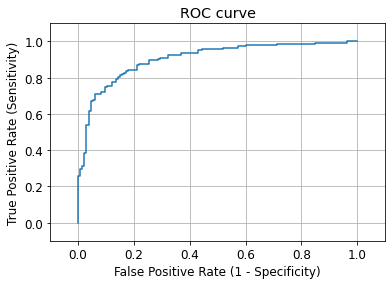

In [ ]:
create_ROC_curve(XGB_grid_search)

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model(learning_rate = 0.01):  
# create model
    model = Sequential()
    model.add(Dense(7, input_dim=11, activation='relu'))  
    model.add(Dense(3, input_dim=7, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

# create model
cv = ShuffleSplit(n_splits=5, random_state=0)
model = KerasClassifier(build_fn=create_model, epochs=500, verbose=0)  

#define the grid search parameters
NN_param_grid = {'batch_size' : [30,40,50,60],
                }
NN_grid_search = GridSearchCV(estimator=model, param_grid=NN_param_grid, cv=cv, n_jobs=-1)
NN_grid_search.fit(scaled_X_train, Y_train)
NN_Y_predict = NN_grid_search.best_estimator_.predict(scaled_X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
show_best_params(NN_grid_search)

Best params: {'batch_size': 60}
Best cross validaton score 0.7464285731315613


In [ ]:
create_summary(NN_Y_predict, 'Neural Network')

Accuracy:  0.7598566308243727
Precision:  0.7581699346405228
Recall:  0.7945205479452054
ROC AUC:  0.7581625296117005


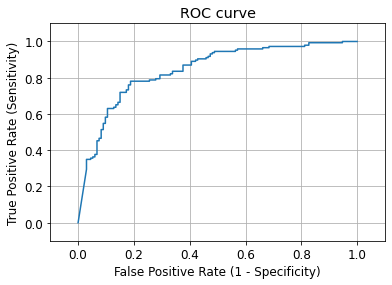

In [ ]:
create_ROC_curve(NN_grid_search)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(scaled_X_train, Y_train)
gnb_Y_predicted = gausnb.predict(scaled_X_test)

In [ ]:
create_summary(gnb_Y_predicted, 'Naive Bayes')

Accuracy:  0.7849462365591398
Precision:  0.8257575757575758
Recall:  0.7465753424657534
ROC AUC:  0.786821505819343


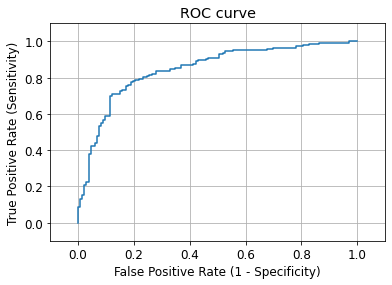

In [ ]:
probs = gnb.predict_proba(scaled_X_test)
preds = probs[:,1]

fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds)

plt.plot(fpr, tpr)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Summary  Table

In [ ]:
pd.DataFrame(summary)

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Logistic Regression,0.788530,0.795918,0.801370,0.787903
1,CVM,0.820789,0.820000,0.842466,0.819729
2,Random Forest,0.867384,0.881119,0.863014,0.867597
3,XGradient Boosting,0.831541,0.851064,0.821918,0.832012
4,Neural Network,0.759857,0.758170,0.794521,0.758163
5,Naive Bayes,0.784946,0.825758,0.746575,0.786822
